# Heart Attack analysis

This dataset contains information about people and there chances of having a heart stroke.

Dataset Information:

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results
    - normal
    - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved

- target :

    - 0 = less chance of heart attack
    - 1 = more chance of heart attack


- Objective:

With the dataset provided for heart analysis, we have to analyse the possibilities of heart attack on the basis of various features, and then the prediction from the analysis will tell us that whether an individual is prone to heart attack or not.
The detailed analysis can proceed with the exploratory data analysis (EDA).

The classification for predication can be done using various machine learning model algorithms, choose the best suited model for heart attack analysis and finally save the model in the pickle (.pkl) file.

- Questions to be answered:

Does the age of a person contribute towards heart attack?

Are different types of chest pain related to each other or the possibility of getting a heart attack?

Does high blood pressure increase the risk of heart attack?

Does the choestrol level eventually contribute as a risk factor towards heart attack?

### 1. Import Relevant Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Observation:

    - You can see know all the columns are already in int or float data types.

In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There's no missing values

In [9]:
## Now we are getting all features and see the duplicates
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(302, 14)

In [15]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Observation:-**

The average blood pressure of an individual (trtbps column) is 130 whereas the maximun value goes upto 200.

The average heart rate of the group (thalachh column) is 152, whereas overall it ranges between 133 to 202

Age of the group (age column) varies from 29 to 77 and the mean age is 54.42

In [21]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [28]:
df['age'].max()

77

In [23]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [24]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [27]:
df['cp'].max()

3

In [25]:
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [26]:
df['trtbps'].max()

200

In [34]:
df['trtbps'].min()

94

In [29]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [30]:
df['chol'].max()

564

In [31]:
df['thall'].unique()

array([1, 2, 3, 0], dtype=int64)

In [32]:
df['exng'].unique()

array([0, 1], dtype=int64)

In [33]:
## or we can use loop function to check unique values using this methods
# list_col=['sex','chol','trtbps','cp','thall','exng']

# for col in list_col: 
#     print('{} :{} ' . format(col.upper(),df[col].unique()))
#     print('{} :{} ' . format(col.upper(),df[col].max()))

Observation:

- There are two sex : 0 and 1
- The highest cholestrol level is 564 and the lowest is 126.
- Resting Blood Pressure of individuals vary between 94 to 200.
- There are 4 types of chest pain.
- exercise induced angina has 2 types (1 = yes; 0 = no)

### 2. Exploratory Data Analysis (EDA)

In [35]:
df.sex.value_counts()[0]

96

In [36]:
df.sex.value_counts()[1]

206

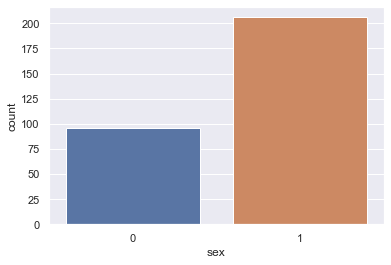

In [37]:
p = sns.countplot(data=df, x="sex", palette='deep')
plt.show()

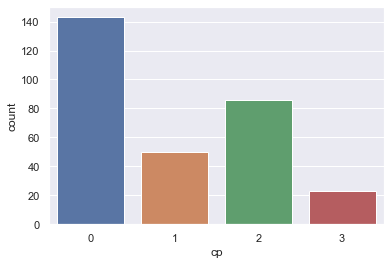

In [38]:
## this will show 4 types of pain chest
chest_pain = sns.countplot(data=df, x="cp", palette='deep')
plt.show()

**Observation:**

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic
- People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest

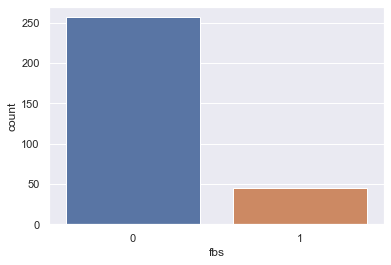

In [39]:
fasting_blood_sugar = sns.countplot(data=df, x="fbs", palette='deep')
plt.show()

**Observation:**

- People of category '0' have the highest count, whereas of count of '1' is the lowest

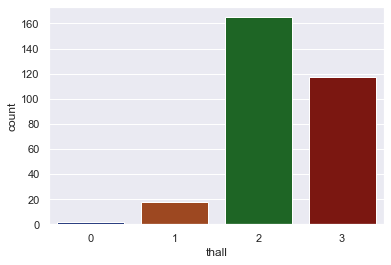

In [40]:
maximum_heart_rate = sns.countplot(x='thall', data=df, palette='dark')
plt.show()

**Observation:**
    
    - Thall count is maximum for type 2 ( 165 ) and min for type 0 ( 2 ) .

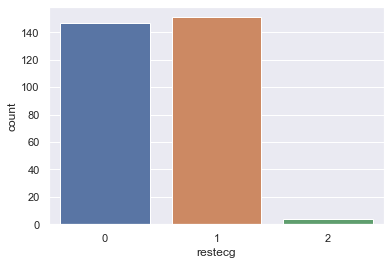

In [41]:
resting_electrocardiographic = sns.countplot(x='restecg', data=df, palette='deep')
plt.show()

- rest_ecg : resting electrocardiographic results
    - 0 and 1 is almost the same
    - type 2 is negligible

In [42]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:xlabel='caa', ylabel='age'>

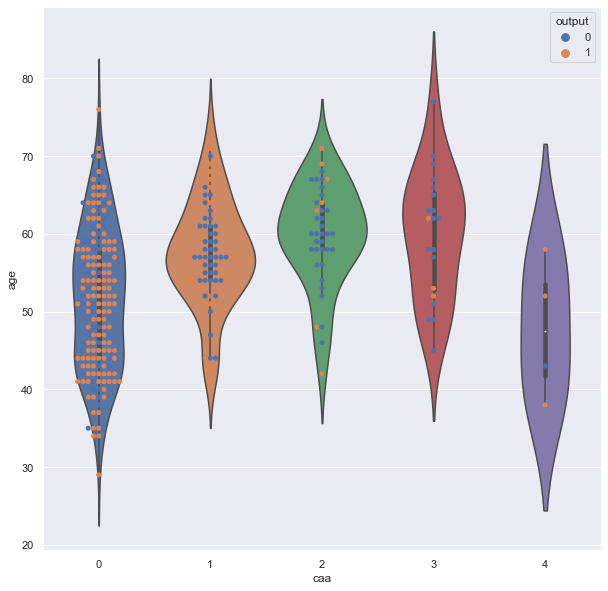

In [44]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='deep')

**Observation:**

- This swarmplot gives us a lot of information.

- Accoring to the figure, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.

- While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.

- People belonging to category '1' , '2' and '3' are more or less at similar risk.

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


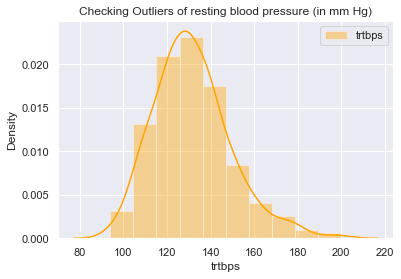

In [49]:
sns.color_palette("dark")
plt.title('Checking Outliers of resting blood pressure (in mm Hg)')
sns.distplot(df.trtbps, label='resting blood pressure', kde=True, bins=10, color='orange')
plt.legend()

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


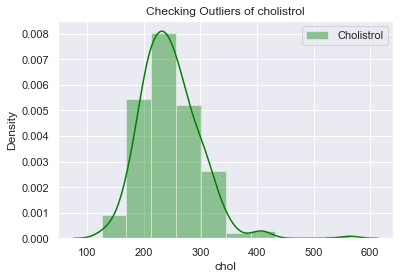

In [56]:
plt.title('Checking Outliers of cholistrol')
sns.distplot(df.chol, label='Cholistrol', kde=True, bins=10, color='green')
plt.legend()

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


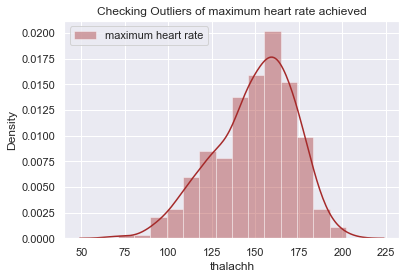

In [55]:
plt.title('Checking Outliers of maximum heart rate achieved')
sns.distplot(df['thalachh'],label='maximum heart rate', kde=True, color = 'brown' )
plt.legend()

**Observations:**

- trtbps (resting blood pressure) and chol looks like they are normally distributed, with some outliers highly skewed towards right.
- In case of thalachh (maximum heart rate) the data is highly skewed towards right!

In [57]:
## we have to remove outlier to make it normally distributed
## so now we will identify the outlier

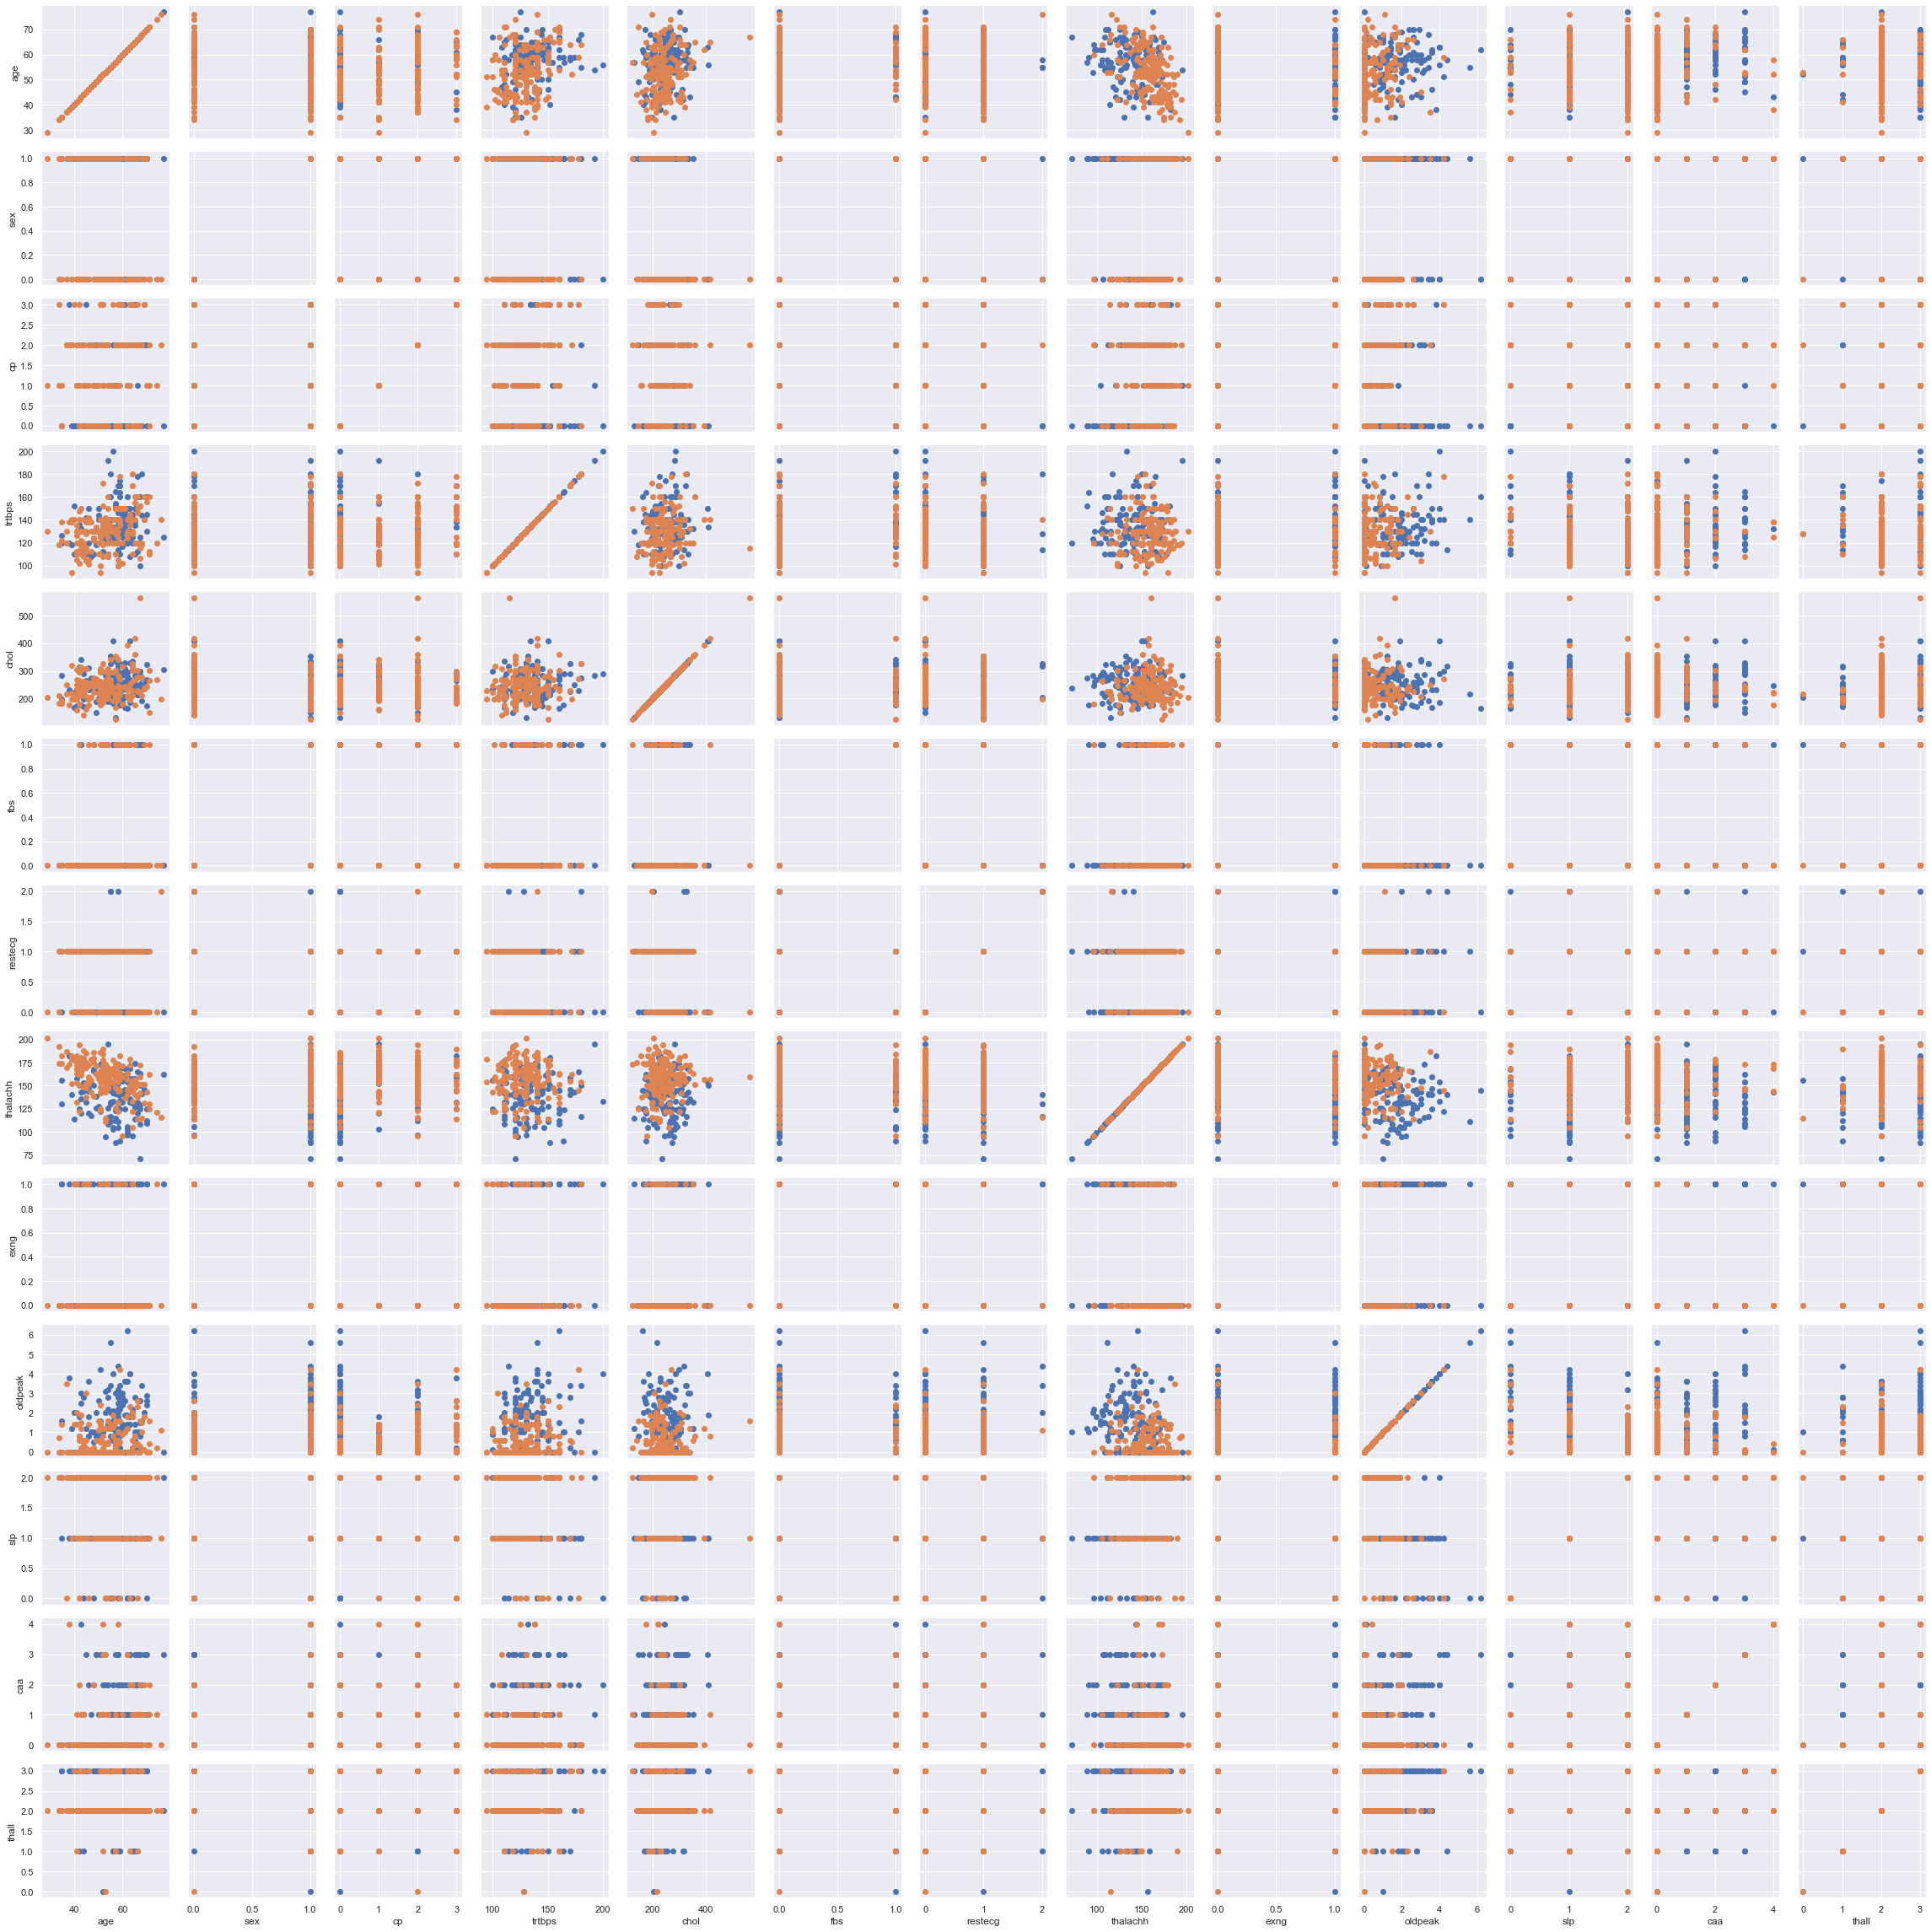

In [59]:
df_pair_grid=sns.PairGrid(df,hue="output")
df_pair_grid.map(plt.scatter)

In [60]:
## Pair plot helps us to see data destribution and identfy outlier

In [62]:
## now we will export our preprocessed model and start to modelling

### 3. Export our dataframe in a new csv file

In [64]:
df.to_csv('df_EDA.csv', index=False)